In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GCRCatalogs
from scipy.stats import gaussian_kde
import FoFCatalogMatching
import h5py
import glob
import re

1 bin case

In [2]:
filenames_truth=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/z_*.step_all.healpix_*_magwerrSNtrim.hdf5')])

In [3]:
truth={}
mag_i_lsst_truth={}
for i in filenames_truth:
    f = h5py.File(i)
    data=f['photometry']
    z=np.array(data['redshift'])
    ids=np.array(data['id'])
    mag_i_lsst=np.array(data['mag_i_lsst'])
    truth_subset=dict(zip(ids,z))
    mag_i_lsst_subset=dict(zip(ids,mag_i_lsst))
    truth.update(truth_subset)
    mag_i_lsst_truth.update(mag_i_lsst_subset)

In [4]:
filenames_photoz=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/pipelinedir/outputs/photoz_pdf_z_*.step_all.healpix_*.hdf5')])

In [5]:
pdf={}
point_estimates_mode={}
odds={}
for i in filenames_photoz:
    f = h5py.File(i,'r')
    pdf_single=np.array(f['pdf']['pdf'])
    point_estimates_mode_single=np.array(f['point_estimates']['z_mode'])
    odds_single=np.array(f['point_estimates']['ODDS'])
    ids=np.array(f['id']['galaxy_id'])
    pdf_subset=dict(zip(ids,pdf_single))
    point_estimates_mode_subset=dict(zip(ids,point_estimates_mode_single))
    odds_subset=dict(zip(ids,odds_single))
    odds.update(odds_subset)
    pdf.update(pdf_subset)
    point_estimates_mode.update(point_estimates_mode_subset)

In [ ]:
# CHECK FLOAT MEMORY ERROR

In [6]:
odds_array=np.array(list(odds.values()))
pdf_array = np.array(list(pdf.values())).astype(np.float)
keys_array = np.array(list(pdf.keys()))

In [8]:
pdf_stacked=np.sum(pdf_array.astype(np.float),axis=0)
grid=np.linspace(0,3.5,351) #READ THIS IN

In [9]:
# test sorting
keys_array_truth = np.array(list(truth.keys()))
keys_array_photoz = np.array(list(point_estimates_mode.keys()))
print(keys_array_truth[0:5])
print(keys_array_photoz[0:5])

[9687500000 9687500001 9687500002 9687500003 9687500004]
[9687500000 9687500001 9687500002 9687500003 9687500004]


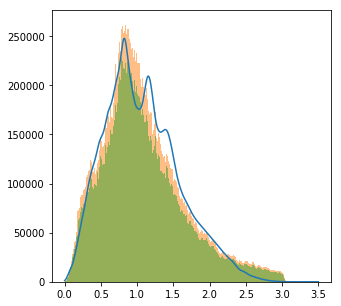

In [37]:
plt.figure(figsize=(5,5))
plt.plot(grid,pdf_stacked)
plt.hist(truth.values(),bins=301,alpha=0.5)
plt.hist(truth.values(),bins=351,alpha=0.5)
plt.show()

In [30]:
truth_array=np.array(list(truth.values()))

In [49]:
cut=0.2
pdf_stacked_odds_cut=np.sum(pdf_array[np.where(odds_array>cut)[0],:],axis=0)
truth_array_odds_cut=truth_array[np.where(odds_array>cut)[0]]
# bpz_array_odds_cut=bpz_array[np.where(odds_array>cut)[0]]

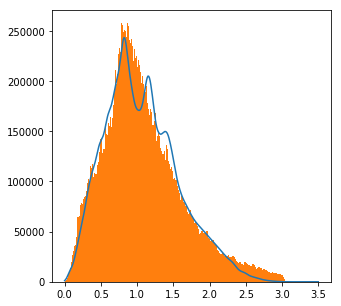

In [50]:
plt.figure(figsize=(5,5))
plt.plot(grid,pdf_stacked_odds_cut)
plt.hist(truth_array_odds_cut,bins=300)
plt.show()

3 bin case

In [ ]:
filenames_truth_z_0_1=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/z_0_1.step_all.healpix_*_magwerrSNtrim.hdf5')])
filenames_truth_z_1_2=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/z_1_2.step_all.healpix_*_magwerrSNtrim.hdf5')])
filenames_truth_z_2_3=np.sort([i for i in glob.glob('/global/projecta/projectdirs/lsst/groups/PZ/PhotoZDC2/COSMODC2v1.1.4/10_year_error_estimates/z_2_3.step_all.healpix_*_magwerrSNtrim.hdf5')])
truth_z_0_1={}
for i in filenames_truth_z_0_1:
    f = h5py.File(i)
    data=f['photometry']
    z=np.array(data['redshift'])
    ids=np.array(data['id'])
    truth_subset=dict(zip(ids,z))
    truth_z_0_1.update(truth_subset)
truth_z_1_2={}
for i in filenames_truth_z_1_2:
    f = h5py.File(i)
    data=f['photometry']
    z=np.array(data['redshift'])
    ids=np.array(data['id'])
    truth_subset=dict(zip(ids,z))
    truth_z_1_2.update(truth_subset)
truth_z_2_3={}
for i in filenames_truth_z_2_3:
    f = h5py.File(i)
    data=f['photometry']
    z=np.array(data['redshift'])
    ids=np.array(data['id'])
    truth_subset=dict(zip(ids,z))
    truth_z_2_3.update(truth_subset)
truth_array_z_0_1=np.array(list(truth_z_0_1.values()))
truth_array_z_1_2=np.array(list(truth_z_1_2.values()))
truth_array_z_2_3=np.array(list(truth_z_2_3.values()))

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(grid,pdf_stacked_float64)
plt.hist(truth_array_z_0_1,bins=100)
plt.hist(truth_array_z_1_2,bins=100)
plt.hist(truth_array_z_2_3,bins=100)
plt.show()

Scatter plots

In [51]:
bpz_array=np.array(list(point_estimates_mode.values()))

In [52]:
import random
selection=np.array(random.sample(range(len(truth.values())), 1000000))

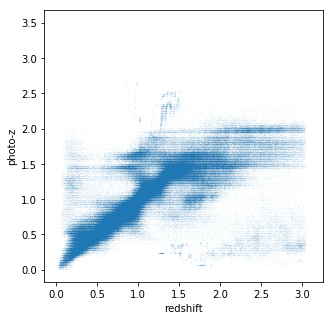

In [53]:
plt.figure(figsize=(5,5))
plt.scatter(truth_array[selection],bpz_array[selection],s=0.0001)
plt.xlabel('redshift')
plt.ylabel('photo-z')
plt.show()

Text(0, 0.5, 'photo-z')

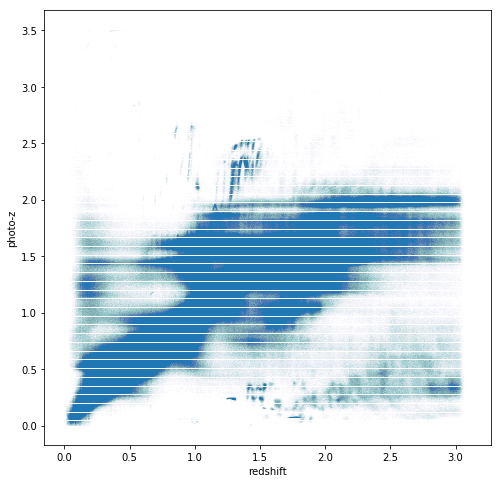

In [212]:
plt.figure(figsize=(8,8))
plt.scatter(truth_array,bpz_array,s=0.00001)
plt.xlabel('redshift')
plt.ylabel('photo-z')
plt.show()

Match Sam's objects to GCRCatalog and get additional quantities

In [54]:
cat=GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small_photoz_magerr_10y')

In [70]:
gcr_matched_data=cat.get_quantities(['galaxy_id','ra','dec','mag_i_obs',],filters=[(lambda x: np.in1d(x, keys_array, True), 'galaxy_id')])

mag_i_lsst in Sam's file == mag_i_obs in GCRCatalog 

In [94]:
#sorted(q for q in cat.list_all_quantities()) #if re.match('mag',q))

In [87]:
cat.get_quantity_info('mag_i')

In [88]:
cat2=GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [95]:
#sorted(cat2.list_all_quantities())

In [96]:
#https://github.com/LSSTDESC/gcr-catalogs/blob/master/GCRCatalogs/SCHEMA.md